Here we show 1-d, non-conditional posteriors (or you can equivalently think about is conditional posteriors at one fixed value of conditioning input) and the optimal MCPD with respect to these posteriors. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [56]:
%matplotlib notebook

## Parameters go here 

In [68]:
# The pdf for each posterior is a sum of Gaussian bumps with a fixed standard deviation (this is basic a kernel density
# estimate of a pdf).  Here we list where those bumps are located for each posterior

q_0_ctrs = [-6.5, -5.5, -3.8, -3.8, 2, 2, 3, 3]
q_1_ctrs = [-6.5, -3.8,  2, 2, 2, 3, 3, 7, 8]

# The width of the kernel for generating the pdfs 
krn_std = 1.0

x_vls = np.linspace(-10, 10, 10000)

# Size of figure to create
figsize = [3, 2]

# Location and name to save figure to
save_loc = r'/Users/bishopw/Desktop/optimal_mcpd.eps'


## Get the values of the posteriors and optimal MCPD

In [61]:
q_0_vls = np.sum(np.stack([norm.pdf(x=x_vls, scale=krn_std, loc=ctr) for ctr in q_0_ctrs]), axis=0)
q_0_vls = q_0_vls/np.sum(q_0_vls)

q_1_vls = np.sum(np.stack([norm.pdf(x=x_vls, scale=krn_std, loc=ctr) for ctr in q_1_ctrs]), axis=0)
q_1_vls = q_1_vls/np.sum(q_1_vls)

mcpd = .5*(q_0_vls + q_1_vls)

<IPython.core.display.Javascript object>


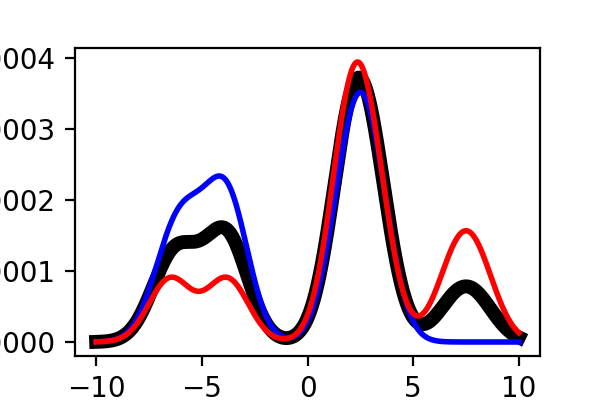

In [69]:
fig, ax = plt.subplots(figsize=figsize) # or 
ax.plot(x_vls, mcpd, 'k-', linewidth=5)
ax.plot(x_vls, q_0_vls, 'b-', linewidth=2)
ax.plot(x_vls, q_1_vls, 'r-', linewidth=2)
plt.xlabel('theta (a.u.)')
plt.ylabel('p(theta)')

fig.savefig(save_loc, format='eps')



In [46]:
q_1_vls.shape

(100,)